In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import zipfile,os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
#Extract ZIP File
local_zip = '/content/gdrive/My Drive/Dataset/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/Dataset')
zip_ref.close()

In [4]:
data_dir = '/content/gdrive/My Drive/Dataset/rockpaperscissors/rps-cv-images'
os.listdir(data_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [5]:
img_height = 150
img_width = 150
batch_size = 50

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
#Build CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width, 1)),
    tf.keras.layers.MaxPooling2D(4, 4),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
callback_path = '/content/gdrive/My Drive/Dataset/rockpaperscissors/callback'
model_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = callback_path,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=15,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [model_callback],
      verbose=2)

Epoch 1/25
25/25 - 26s - loss: 1.0961 - accuracy: 0.3616 - val_loss: 1.0775 - val_accuracy: 0.5547
Epoch 2/25
25/25 - 25s - loss: 1.0105 - accuracy: 0.5099 - val_loss: 0.9034 - val_accuracy: 0.5680
Epoch 3/25
25/25 - 25s - loss: 0.6985 - accuracy: 0.7381 - val_loss: 0.5221 - val_accuracy: 0.8240
Epoch 4/25
25/25 - 25s - loss: 0.4499 - accuracy: 0.8353 - val_loss: 0.3874 - val_accuracy: 0.8827
Epoch 5/25
25/25 - 25s - loss: 0.3072 - accuracy: 0.8937 - val_loss: 0.3062 - val_accuracy: 0.8947
Epoch 6/25
25/25 - 25s - loss: 0.2841 - accuracy: 0.8960 - val_loss: 0.3368 - val_accuracy: 0.8960
Epoch 7/25
25/25 - 25s - loss: 0.1969 - accuracy: 0.9308 - val_loss: 0.1955 - val_accuracy: 0.9387
Epoch 8/25
25/25 - 25s - loss: 0.1625 - accuracy: 0.9423 - val_loss: 0.1963 - val_accuracy: 0.9413
Epoch 9/25
25/25 - 28s - loss: 0.1381 - accuracy: 0.9522 - val_loss: 0.1647 - val_accuracy: 0.9480
Epoch 10/25
25/25 - 25s - loss: 0.1112 - accuracy: 0.9629 - val_loss: 0.1633 - val_accuracy: 0.9587
Epoch 11/

In [10]:
best_index = np.argmax(history.history['val_accuracy'])
print('best model : acc = {:.4f}, loss = {:.4f}, val_acc = {:.4f}, val_loss = {:.4f}'.format(history.history['accuracy'][best_index],
                                                                                     history.history['loss'][best_index],
                                                                                     history.history['val_accuracy'][best_index],
                                                                                     history.history['val_loss'][best_index]))

best model : acc = 0.9951, loss = 0.0231, val_acc = 0.9747, val_loss = 0.1741


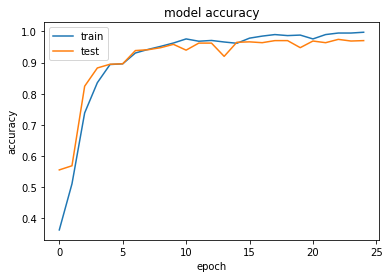

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

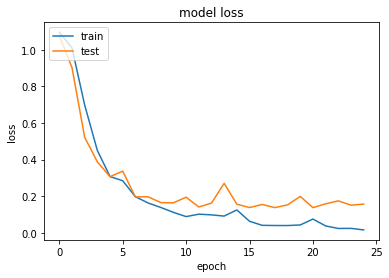

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Rock-Paper-Scissors Game 
#<b>Player vs Computer</b>

In [13]:
def labelling(label_pred):
    if label_pred[0]==0:
      label = 'Paper'
    elif label_pred[0]==1:
      label = 'Rock'
    else:
      label = 'Scissors'
    return label

In [14]:
import random

def RandomImagePath():
  subfolder_dir  = os.listdir(data_dir)
  x = random.randint(0,2)
  files_dir = os.listdir(data_dir + '/' + subfolder_dir[x])
  random_file = random.choice(files_dir)
  img_dir = data_dir + '/' + subfolder_dir[x] + '/' + random_file
  return img_dir

Saving WhatsApp Image 2020-10-18 at 4.53.06 PM.jpeg to WhatsApp Image 2020-10-18 at 4.53.06 PM (1).jpeg
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


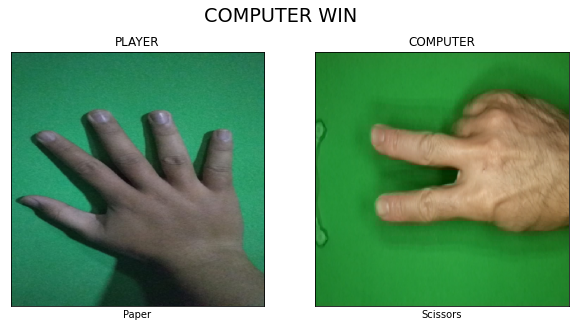

In [16]:
from google.colab import files
from keras.preprocessing import image

model.load_weights(callback_path)

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img_player_rgb = image.load_img(path, target_size=(400,400))
  img_player = image.load_img(path, target_size=(img_height,img_width), color_mode = 'grayscale')
  x = image.img_to_array(img_player)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  label_pred = model.predict_classes(images, batch_size=10)
  label_player = labelling(label_pred)

path = RandomImagePath()
img_comp_rgb = image.load_img(path, target_size=(400,400))
img_comp = image.load_img(path, target_size=(img_height,img_width), color_mode = 'grayscale')
x = image.img_to_array(img_comp)
x = np.expand_dims(x, axis=0)
  
images = np.vstack([x])
label_pred = model.predict_classes(images, batch_size=10)
label_comp = labelling(label_pred)

if label_player == label_comp:
  title_plot = 'DRAW'
elif label_player == 'Paper':
  if label_comp == 'Scissors':
    title_plot = 'COMPUTER WIN'
  else:
    title_plot = 'PLAYER WIN'
elif label_player == 'Scissors':
  if label_comp == 'Rock':
    title_plot = 'COMPUTER WIN'
  else:
    title_plot = 'PLAYER WIN'
elif label_player == 'Rock':
  if label_comp == 'Paper':
    title_plot = 'COMPUTER WIN'
  else: 
    title_plot = 'PLAYER WIN'

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
plt.rc('font', size=16)
fig.suptitle(title_plot)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.title.set_text('PLAYER')
ax1.set_xlabel(label_player)
ax1.imshow(img_player_rgb)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.title.set_text('COMPUTER')
ax2.set_xlabel(label_comp)
ax2.imshow(img_comp_rgb)